# Introduction to Data Science 2025

# Week 6: Recap

## Exercise 1 | Linear regression with feature selection

Download the [TED Talks](https://www.kaggle.com/rounakbanik/ted-talks) dataset from Kaggle. Your task is to predict both the ratings and the number of views of a given TED talk. You should focus only on the <span style="font-weight: bold">ted_main</span> table.

1. Download the data, extract the following ratings from column <span style="font-weight: bold">ratings</span>: <span style="font-weight: bold">Funny</span>, <span style="font-weight: bold">Confusing</span>, <span style="font-weight: bold">Inspiring</span>. Store these values into respective columns so that they are easier to access. Next, extract the tags from column <span style="font-weight: bold">tags</span>. Count the number of occurrences of each tag and select the top-100 most common tags. Create a binary variable for each of these and include them in your data table, so that you can directly see whether a given tag (among the top-100 tags) is used in a given TED talk or not. The dataset you compose should have dimension (2550, 104), and comprise of the 'views' column, the three columns with counts of "Funny", "Confusing and "Inspiring" ratings, and 100 columns which one-hot encode the top-100 most common tag columns.


In [1]:
# Use this cell for your code

import pandas as pd
import ast
from sklearn.preprocessing import MultiLabelBinarizer


'''
deat the data
'''
data = pd.read_csv('ted_main.csv')

'''
This converts the JSON-like string to a dict
'''
data['ratings'] = data['ratings'].apply(ast.literal_eval)


'''
raiting count for each name
'''
def get_rating(ratings, name):
    for r in ratings:
        if r['name'] == name:
            return r['count']
    return 0
'''
3 columns for the three attributes - funny, confusing, inspiring
'''
for col in ['Funny', 'Confusing', 'Inspiring']:
    data[col] = data['ratings'].apply(lambda x: get_rating(x, col))

data['tags'] = data['tags'].apply(ast.literal_eval)

mlb = MultiLabelBinarizer()
tag_encoded = pd.DataFrame(mlb.fit_transform(data['tags']),
                           columns=mlb.classes_, index=data.index)
final_df = pd.concat([data[['views', 'Funny', 'Confusing', 'Inspiring']], tag_encoded], axis=1)

print(final_df.shape) 
final_df.head()


(2550, 420)


,views,Funny,Confusing,Inspiring,3d printing,AI,AIDS,Addiction,Africa,Alzheimer's,...,wikipedia,wind energy,women,women in business,work,work-life balance,world cultures,writing,wunderkind,youth
0,47227110,19645,242,24924,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3200520,544,62,413,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1636292,964,27,230,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1697550,59,32,1070,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12005869,1390,72,2893,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


2. Construct a linear regression model to predict the number of views based on the data in the <span style="font-weight: bold">ted_main</span> table, including the binary variables for the top-100 tags that you just created.

In [2]:
# Use this cell for your code

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = final_df.drop('views', axis=1)
y = final_df['views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(y_pred,r2)


[ 4.62368677e+05  2.45118840e+06  2.72495385e+03  7.27249596e+05
  1.10382815e+06  2.16415623e+06 -3.64977594e+04  1.09884171e+06
  1.37296866e+06  2.37242300e+06  1.82650577e+06  1.62433439e+06
  5.58635736e+05  1.40961005e+06  3.83964003e+06  1.02311349e+06
 -1.76384022e+05  1.68886343e+04  2.15292612e+06  1.03933073e+06
  8.65690582e+05  1.49364446e+05  8.10372639e+06  3.77490317e+05
  3.50060586e+06  1.35171083e+06  1.71792014e+06  9.84386794e+05
  2.56584438e+06  1.19215380e+06  2.05868246e+06  2.60664646e+04
  2.28942613e+06  1.05290827e+06  2.24534080e+06  8.96869516e+05
  2.29974277e+06  2.62400348e+06  9.79721787e+05  1.74318970e+06
  2.16459384e+06  1.17664119e+06  7.22776262e+05  1.28712226e+06
  1.35006107e+06  3.08239957e+06 -9.21390467e+04  9.98343359e+05
  1.20978289e+06  1.24968058e+06  1.91450149e+06  9.92423839e+05
  1.17460178e+06  1.65178014e+06  8.03330845e+05  1.76309468e+06
  1.17544639e+06  2.56982619e+05  1.10444803e+06  3.77043392e+05
  4.03179371e+05  1.19748

3. Do the same for the <span style="font-weight: bold">Funny</span>, <span style="font-weight: bold">Confusing</span>, and <span style="font-weight: bold">Inspiring</span> ratings.


In [3]:
# Use this cell for your code
from sklearn.metrics import mean_squared_error

X = final_df.drop(['views', 'Funny', 'Confusing', 'Inspiring'], axis=1)
targets = ['Funny', 'Confusing', 'Inspiring']

for target in targets:
    y = final_df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(r2,mse)

-0.06471703789979721 142969.55247650525
0.07534670288106804 837.209922637803
-0.1743675881749509 1078395.9252090473


4. You will probably notice that most of the tags are not useful in predicting the views and the ratings. You should use some kind of variable selection to prune the set of tags that are included in the model. You can use for example classical p-values or more modern [LASSO](https://en.wikipedia.org/wiki/Lasso_(statistics)) techniques. Which tags are the best predictors of each of the response variables?

In [ ]:
# Use this cell for your code

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler


X = final_df.drop(['views', 'Funny', 'Confusing', 'Inspiring'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

targets = ['views', 'Funny', 'Confusing', 'Inspiring']
important_tags = {}

for target in targets:
    y = final_df[target]
    lasso = LassoCV(cv=5, random_state=42)
    lasso.fit(X_scaled, y)
    coefs = pd.Series(lasso.coef_, index=X.columns)
    non_zero = coefs[coefs != 0].sort_values(ascending=False)
    important_tags[target] = non_zero
    print(target, non_zero.head(10),len(non_zero))
    

5. Produce summaries of your results. Could you recommend good tags – or tags to avoid! – for speakers targeting plenty of views and/or certain ratings?

views success          281544.762221
psychology       251402.839491
body language    193713.673245
culture          106847.985176
dance             74757.312678
brain             53129.906484
magic             44321.921024
depression        21667.523421
work              21526.612028
comedy            19900.439147
dtype: float64 15
Funny comedy          88.019470
humor           58.378272
dance           34.107591
teaching        14.292046
productivity     9.412108
culture          3.397894
psychology       0.949627
dtype: float64 7
Confusing apes               4.686795
culture            3.044009
psychology         2.137953
philosophy         1.898877
TED Brain Trust    1.844744
brain              1.822756
physics            1.606976
magic              1.412608
consciousness      1.286903
dance              1.255543
dtype: float64 51
Inspiring success          178.251791
psychology        82.260686
self              69.160390
body language     64.840723
depression        63.451418
lea

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Symbol classification (part 2)

Note that it is strongly recommended to use Python in this exercise. However, if you can find a suitable AutoML implementation for your favorite language (e.g [here](http://h2o-release.s3.amazonaws.com/h2o/master/3888/docs-website/h2o-docs/automl.html) seems to be one for R) then you are free to use that language as well.

Use the preprocessed data from week 3 (you can also produce them using the example solutions of week 3).

1. This time train a *random forest classifier* on the data. A random forest is a collection of *decision trees*, which makes it an *ensemble* of classifiers. Each tree uses a random subset of the features to make its prediction. Without tuning any parameters, how is the accuracy?

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


data = pd.read_csv("transcripts.csv", sep=",")
texts = data['transcript']
labels = (data.index % 2 == 0).astype(int)  


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print("Random Forest accuracy:", accuracy_score(y_test, y_pred))


Random Forest accuracy: 0.4898785425101215


2. The amount of trees to use as a part of the random forest is an example of a hyperparameter, because it is a parameter that is set prior to the learning process. In contrast, a parameter is a value in the model that is learned from the data. Train 20 classifiers, with varying amounts of decision trees starting from 10 up until 200, and plot the test accuracy as a function of the amount of classifiers. Does the accuracy keep increasing? Is more better?

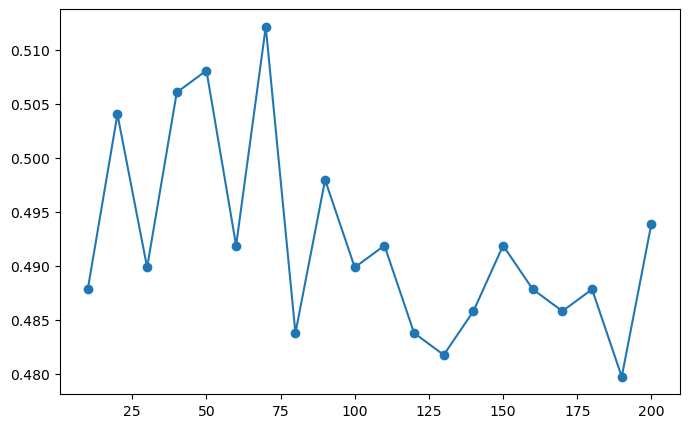

In [8]:
# Use this cell for your code
import matplotlib.pyplot as plt
import numpy as np

n_trees_list = np.linspace(10, 200, 20, dtype=int)  
test_accuracies = []

for n_trees in n_trees_list:
    rf_model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    test_accuracies.append(acc)

plt.figure(figsize=(8,5))
plt.plot(n_trees_list, test_accuracies, marker='o')
plt.show()

3. If we had picked the amount of decision trees by taking the value with the best test accuracy from the last plot, we would have *overfit* our hyperparameters to the test data. Can you see why it is a mistake to tune hyperparameters of your model by using the test data?

*You can use this markdown cell to write down your thoughts.*

The test accuracy peaks around 50–60 trees, then fluctuates and even drops as we keep adding more trees.
This shows that more trees don’t necessarily mean better performance on this dataset

4. Reshuffle and resplit the data so that it is divided in 3 parts: training (80%), validation (10%) and test (10%). Repeatedly train a model of your choosing (e.g random forest) on the training data, and evaluate it’s performance on the validation set, while tuning the hyperparameters so that the accuracy on the validation set increases. Then, finally evaluate the performance of your model on the test data. What can you say in terms of the generalization of your model?

In [ ]:
# Use this cell for your code



**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | TPOT

The process of picking a suitable model, evaluating its performance and tuning the hyperparameters is very time consuming. A new idea in machine learning is the concept of automating this by using an optimization algorithm to find the best model in the space of models and their hyperparameters. Have a look at [TPOT](https://github.com/EpistasisLab/tpot), an automated ML solution that finds a good model and a good set of hyperparameters automatically. Try it on this data, it should outperform simple models like the ones we tried easily. Note that running the algorithm might take a while, depending on the strength of your computer. 

*Note*: In case it is running for too long, try checking if the parameters you are using when calling TPOT are reasonable, i.e. try reducing number of ‘generations’ or ‘population_size’. TPOT uses cross-validation internally, so we don’t need our own validation set.

In [13]:
# Use this cell for your code









**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**